In [41]:
import pyupbit
import numpy as np
import pandas as pd

#로그인
access = "rY2mxeDmWiiAxyfwWgQcJFsfCkjSTomMxel1iGZg"          # 본인 값으로 변경
secret = "vxrsTBUI4K2Jx5yxr7kX7YXLuTAA3ziKAIRsvxRu"          # 본인 값으로 변경
upbit = pyupbit.Upbit(access, secret)


#일별
df = pyupbit.get_ohlcv("KRW-BTC",interval='minute60')
print(df)


                           open        high         low       close  \
2021-05-21 17:00:00  49333000.0  49900000.0  48742000.0  49738000.0   
2021-05-21 18:00:00  49738000.0  50970000.0  49676000.0  50643000.0   
2021-05-21 19:00:00  50643000.0  50995000.0  50258000.0  50775000.0   
2021-05-21 20:00:00  50773000.0  51400000.0  50134000.0  51390000.0   
2021-05-21 21:00:00  51390000.0  51700000.0  50531000.0  50606000.0   
...                         ...         ...         ...         ...   
2021-05-29 20:00:00  42720000.0  43258000.0  42088000.0  42845000.0   
2021-05-29 21:00:00  42844000.0  42848000.0  42180000.0  42209000.0   
2021-05-29 22:00:00  42209000.0  42393000.0  41405000.0  42159000.0   
2021-05-29 23:00:00  42160000.0  42600000.0  41861000.0  42097000.0   
2021-05-30 00:00:00  42071000.0  42161000.0  41530000.0  42047000.0   

                          volume  
2021-05-21 17:00:00   657.864999  
2021-05-21 18:00:00   890.881482  
2021-05-21 19:00:00   466.789960  
2021-05

In [42]:
#시간(ds)과 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-05-21 17:00:00,49738000.0
1,2021-05-21 18:00:00,50643000.0
2,2021-05-21 19:00:00,50775000.0
3,2021-05-21 20:00:00,51390000.0
4,2021-05-21 21:00:00,50606000.0
...,...,...
195,2021-05-29 20:00:00,42845000.0
196,2021-05-29 21:00:00,42209000.0
197,2021-05-29 22:00:00,42159000.0
198,2021-05-29 23:00:00,42097000.0


In [43]:
#prophet 불러옴
from fbprophet import Prophet

In [44]:
#학습
model =Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
C:\Users\no100\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [45]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=48, freq='H')
forecast = model.predict(future)

In [46]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-21 17:00:00,4.956146e+07,4.828130e+07,5.069451e+07,4.956146e+07,4.956146e+07,-78568.449081,-78568.449081,-78568.449081,-78568.449081,-78568.449081,-78568.449081,0.0,0.0,0.0,4.948289e+07
1,2021-05-21 18:00:00,4.947561e+07,4.823173e+07,5.049500e+07,4.947561e+07,4.947561e+07,-108886.688449,-108886.688449,-108886.688449,-108886.688449,-108886.688449,-108886.688449,0.0,0.0,0.0,4.936672e+07
2,2021-05-21 19:00:00,4.938976e+07,4.823208e+07,5.054150e+07,4.938976e+07,4.938976e+07,1350.488883,1350.488883,1350.488883,1350.488883,1350.488883,1350.488883,0.0,0.0,0.0,4.939111e+07
3,2021-05-21 20:00:00,4.930391e+07,4.840776e+07,5.062931e+07,4.930391e+07,4.930391e+07,194386.214498,194386.214498,194386.214498,194386.214498,194386.214498,194386.214498,0.0,0.0,0.0,4.949830e+07
4,2021-05-21 21:00:00,4.921806e+07,4.832146e+07,5.067386e+07,4.921806e+07,4.921806e+07,313269.739745,313269.739745,313269.739745,313269.739745,313269.739745,313269.739745,0.0,0.0,0.0,4.953133e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2021-05-31 20:00:00,3.831978e+07,3.544485e+07,4.150477e+07,3.536014e+07,4.102416e+07,194386.214502,194386.214502,194386.214502,194386.214502,194386.214502,194386.214502,0.0,0.0,0.0,3.851417e+07
244,2021-05-31 21:00:00,3.822851e+07,3.529318e+07,4.143210e+07,3.518101e+07,4.099573e+07,313269.739744,313269.739744,313269.739744,313269.739744,313269.739744,313269.739744,0.0,0.0,0.0,3.854178e+07
245,2021-05-31 22:00:00,3.813724e+07,3.509453e+07,4.161739e+07,3.500464e+07,4.098489e+07,238802.441242,238802.441242,238802.441242,238802.441242,238802.441242,238802.441242,0.0,0.0,0.0,3.837604e+07
246,2021-05-31 23:00:00,3.804597e+07,3.469014e+07,4.116742e+07,3.483076e+07,4.097083e+07,-4606.142208,-4606.142208,-4606.142208,-4606.142208,-4606.142208,-4606.142208,0.0,0.0,0.0,3.804137e+07


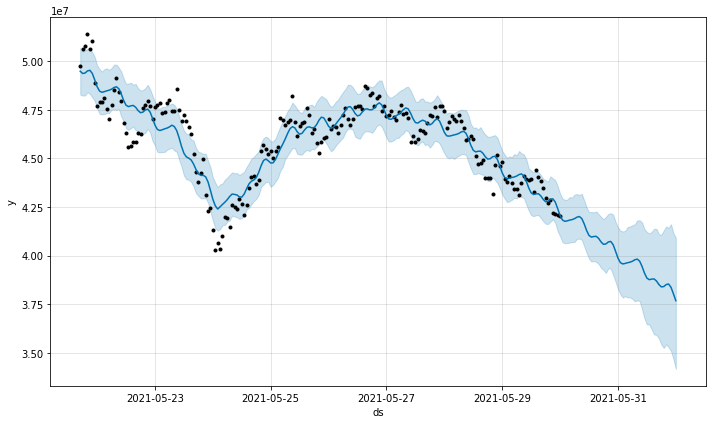

In [47]:
#그래프
fig1 = model.plot(forecast)

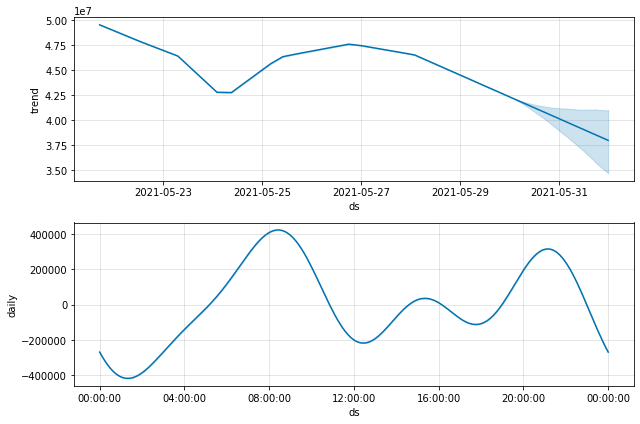

In [48]:
#그래프2
fig2 = model.plot_components(forecast)

In [49]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price('KRW-BTC')
nowValue

42004000.0

In [50]:
#종가의 가격을 구함
#현재 시간이 자정 이전
closedf = forecast[forecast['ds'] ==forecast.iloc[-1]['ds'].replace(hour=9)]
#현재시간이 자정 이후
if len(closedf) ==0:
    closedf = forecast[forecast['ds']== data.iloc[-1]['ds'].replace(hour=9)]
#당일종가
closevalue = closedf['yhat'].values[0]

In [51]:
print("현재 시점 가격:",nowValue)
print("종가의 가격:",closevalue)

현재 시점 가격: 42004000.0
종가의 가격: 41907861.72620903


In [ ]:
forecast['ds'] ==forcast.iloc[-1]x